# <span style="color:orange"> Problems.<span>
*By Laura Lyons*
***

## <span style="color:orange"> Table of Contents <a id="table-of-contents"></a>
***
1. [Introduction](#introduction)
2. [Assigned Problems](#assigned-problems)  
   2.1. [Problem 01 – Extending the Lady Tasting Tea](#problem-01--extending-the-lady-tasting-tea)  
   2.2. [Problem 02 – Normal Distribution](#problem-02--normal-distribution)  
   2.3. [Problem 03 – t-Tests](#problem-03--t-tests)  
   2.4. [Problem 04 – ANOVA](#problem-04--anova)
3. [References](#references)

## <span style="color:orange"> 1. Introduction <span> <a id="introduction"></a>

This notebook was created to fulfill an assessment requirement of Applied Statistics 25-25:(8651), Higher Diploma in Science, Data Analytics, as part of the H.Dip in Science in Data Analytics.

Each week, following a series of lectures, an problem was set, to demonstrate both learning and additional reading/research on the topics discussed in the lectures.

This notebook is a collection of the solutions to the problems set, including some additional guidance and instruction on how to run each assignment/program.

***

## <span style="color:orange">2. Assigned Problems<span> <a id="assigned-problems"></a>

## <span style="color:orange">**Problem 01 - Extending the Lady Tasting Tea**<span> <a id="problem-01--extending-the-lady-tasting-tea"></a>

**1.1 Assignment Instructions:**

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

**1.2 Objective**

The objective of this problem is to simulate the *'Lady Testing Tea'* experiment and compare the probability of correctly identifyig all milk-first ups by changes in:
1. The original 8-cup setup (4 milk-first, 4 tea-first).
1. An extended 12-cup setup (4 milk-first, 8 tea-first).


**1.3 Data Analysis**

First we need to import our prerequisites

In [2]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

Initially we need to define some basic parameters, including the number of cups in total for each experiment,i.e. the original and the extended experient.

In [3]:
# Number of cups of tea in total.
original_number_cups = 8
extended_number_cups = 12

# Number of cups of tea with milk in first.
original_number_cups_milk_first = 4
extended_number_cups_milk_first = 4

# Number of cups of tea with tea in first.
original_number_cups_tea_first = 4
extended_number_cups_tea_first = 8

# Number of ways of selecting four cups from eight.
original_ways = math.comb(original_number_cups, original_number_cups_milk_first)
extended_ways = math.comb(extended_number_cups, extended_number_cups_milk_first)

# Show original number of ways (answer= 70)
original_ways

70

In [4]:
# Show extended number of ways (answer= 495)
extended_ways

495

In [5]:
# Total number of ways of selecting four cups from eight, keeping them in order.
original_ways_ordered = 8 * 7 * 6 * 5

# Show total number of ordered ways (answer= 1680)
original_ways_ordered

1680

In [6]:
# Total number of ways of selecting four cups from 12, keeping them in order.
extended_ways_ordered = 12 * 11 * 10 * 9

# Show total number of ordered ways (answer= 11880)
extended_ways_ordered

11880

In this experiement, we need to build in the functionality to deal with the fact that:
- the same cup cannot be selected twice, and
- the order of the cup combination does not matter.

In [7]:
# No of ways of shuffling four cups.
number_shuffles = 4 * 3 * 2 * 1

# Number of combinations
original_number_of_combinations = original_ways_ordered // number_shuffles
# Floor division operator (//) was used to ensure that the answer retured is an integer, and not a float
# Reference: https://docs.python.org/3/tutorial/floatingpoint.html

# Show original number of combinations (answer= 24)
original_number_of_combinations

70

In [8]:
# Number of combinations
extended_number_of_combinations = extended_ways_ordered // number_shuffles

# Show extended number of combinations (answer= 495)
extended_number_of_combinations

495

We address the ordering of the results by providing each cup with a unique label (order not relevant), and then convert this list into a set.

In [9]:
# The cup labels.
original_labels = list(range(original_number_cups))
extended_labels = list(range(extended_number_cups))

In [10]:
# Show original labels.
original_labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [11]:
# Show extended labels.
extended_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

We now need to calculate the number of different ways of selecting *number_cups_milk_first* of *number_cups*, cups of tea, for both iterations of the experiment.

In [12]:
# Show the different ways of selecting *no_cups_milk_first* out of no_cups cups of tea.
original_combinations = list(itertools.combinations(original_labels, original_number_cups_milk_first))
extended_combinations = list(itertools.combinations(extended_labels, extended_number_cups_milk_first))

We can now check the number of combinations generated, for both iterations of the experiment.

In [13]:
# Number of original combinations.
len(original_combinations)

70

In [14]:
# Number of extended combinations.
len(extended_combinations) 

495

We need to select four random cups to put milk in first.For this we use, 

```ruby
    random.sample(population,k,*,counts=none)
```

Used for [random sampling](https://docs.python.org/3/library/random.html#random.sample) without replacement. 

After which, we must convert the randomly generated list into a set.

In [15]:
# Select four cups at random to put milk in first.
original_labels_milk = random.sample(original_labels, 4)
extended_labels_milk = random.sample(extended_labels, 4)

# Sort, inplace to make comparison easier.
original_labels_milk.sort()
extended_labels_milk.sort()

# Convert to sets.
original_labels_milk = set(original_labels_milk)
extended_labels_milk = set(extended_labels_milk)

# Show.
original_labels_milk


{1, 3, 4, 5}

In [16]:
# Show.
extended_labels_milk

{5, 7, 8, 10}

We now need to calculate the overlap between each element of combinations and original_labels_milk and extended_labels_milk.

In [17]:
# Calculate the overlap between each element of combs and original_labels_milk.

original_number_overlaps = []

# Loop through the original combinations.
for comb in original_combinations:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn original_labels_milk into a set.
  s2 = set(original_labels_milk)
  # Figure out where they overlap.
  original_overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  # print(comb, len(original_overlap), original_overlap)
  # Append overlap to original_number_overlaps.
  original_number_overlaps.append(len(original_overlap))

  # Show the overlaps.
print(original_number_overlaps)

[2, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 4, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 3, 2, 2, 2]


In [18]:
# Calculate the overlap between each element of combs and extended_labels_milk.

extended_number_overlaps = []

# Loop through the extended combinations.
for comb in extended_combinations:
  # Turn comb into a set.
  s3 = set(comb)
  # Turn extended_labels_milk into a set.
  s4 = set(extended_labels_milk)
  # Figure out where they overlap.
  extended_overlap = s3.intersection(s4)
  # Show the combination and the extended overlap.
  # print(comb, len(extended_overlap), extended_overlap)
  # Append overlap to extended_number_overlaps.
  extended_number_overlaps.append(len(extended_overlap))

# Show the overlaps.
print(extended_number_overlaps)

[0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 

In [19]:
# Count the number of times each original_overlap occurs.
original_counts = np.unique(original_number_overlaps, return_counts=True)

# Show.
original_counts

(array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))

In [20]:
# Count the number of times each extended_overlap occurs.
extended_counts = np.unique(extended_number_overlaps, return_counts=True)

# Show.
extended_counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

Now lets create a viualisation of the number of times that each overlap occurs for each iteratio of the experiment.

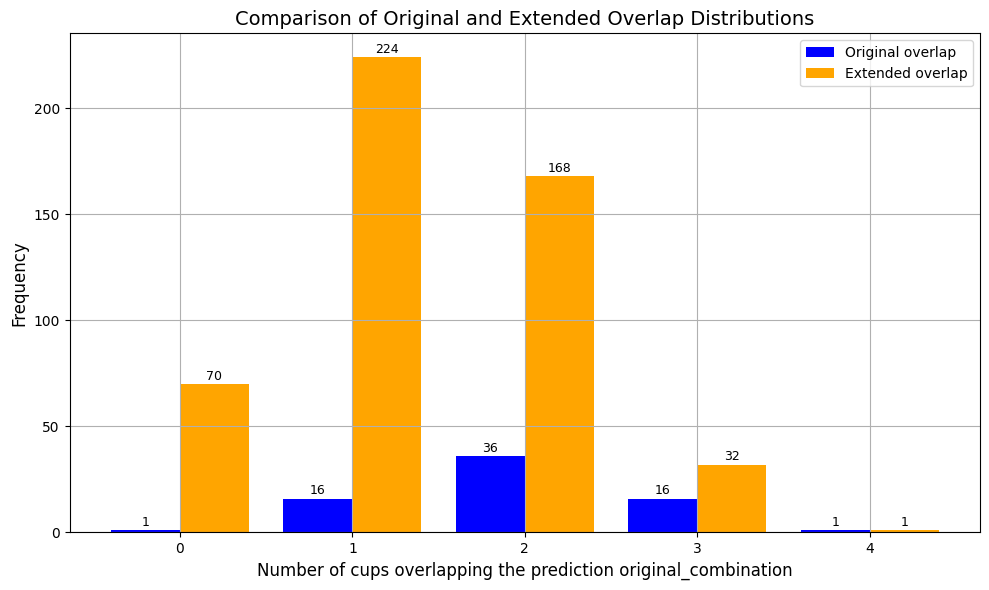

In [21]:
# Original and extended data
original_counts = (np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1]))
extended_counts = (np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1]))

# Bar width and positions
bar_width = 0.4
x = original_counts[0]
x_original = x - bar_width / 2
x_extended = x + bar_width / 2

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(x_original, original_counts[1], width=bar_width, color='blue', label='Original overlap')
ax.bar(x_extended, extended_counts[1], width=bar_width, color='orange', label='Extended overlap')

# Labels and title
ax.set_xlabel('Number of cups overlapping the prediction original_combination', fontsize=12, color='black')
ax.set_ylabel('Frequency', fontsize=12, color='black')
ax.set_title('Comparison of Original and Extended Overlap Distributions', fontsize=14, color='black')
ax.legend()

# Value labels
for x_val, y_val in zip(x_original, original_counts[1]):
    ax.text(x_val, y_val + 2, str(y_val), ha='center', fontsize=9)
for x_val, y_val in zip(x_extended, extended_counts[1]):
    ax.text(x_val, y_val + 2, str(y_val), ha='center', fontsize=9)

plt.tight_layout()
plt.grid(True)
plt.show()


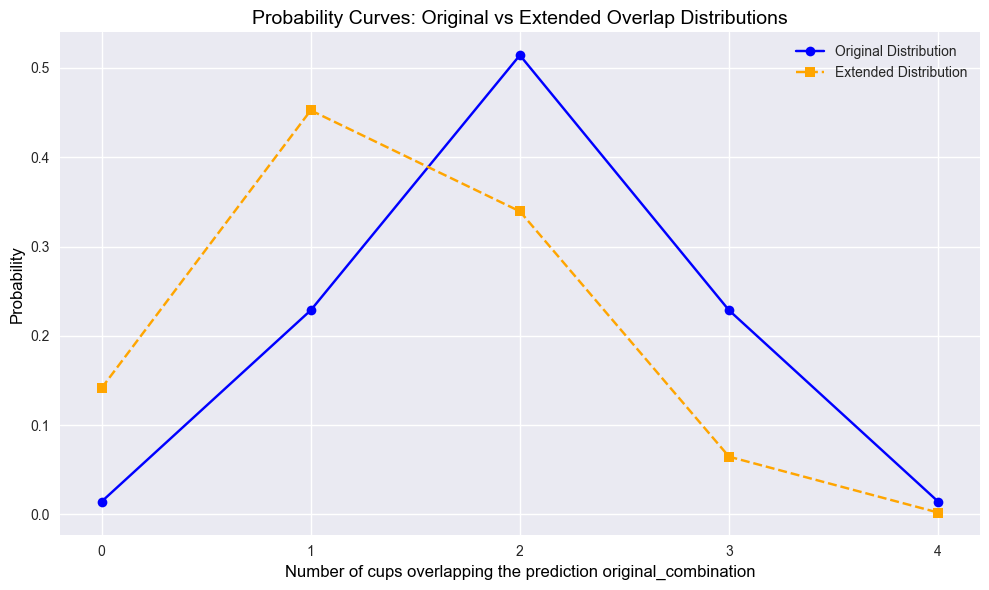

In [22]:
# Creating overlay plot of probability curves for original and extended overlap distributions
# Original and extended frequency data
original_counts = (np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1]))
extended_counts = (np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1]))

# Normalize to convert frequencies into probabilities
original_probs = original_counts[1] / np.sum(original_counts[1])
extended_probs = extended_counts[1] / np.sum(extended_counts[1])

# Create the plot
plt.style.use('seaborn-v0_8') # the -v0_8 version of the seaborn style is used for better aesthetics, as 'seaborn' alone has depreciated.
plt.figure(figsize=(10, 6))

# Plot original probability curve
plt.plot(original_counts[0], original_probs, label='Original Distribution', color='blue', linestyle='-', marker='o')

# Plot extended probability curve
plt.plot(extended_counts[0], extended_probs, label='Extended Distribution', color='orange', linestyle='--', marker='s')

# Add labels and title
plt.xlabel('Number of cups overlapping the prediction original_combination', fontsize=12, color='black')
plt.ylabel('Probability', fontsize=12, color='black')
plt.title('Probability Curves: Original vs Extended Overlap Distributions', fontsize=14, color='black')
plt.legend()
plt.grid(True)

# Force x-axis to show only whole numbers
plt.xticks(np.arange(0, 5, 1))  # from 0 to 4, step 1
plt.tight_layout()


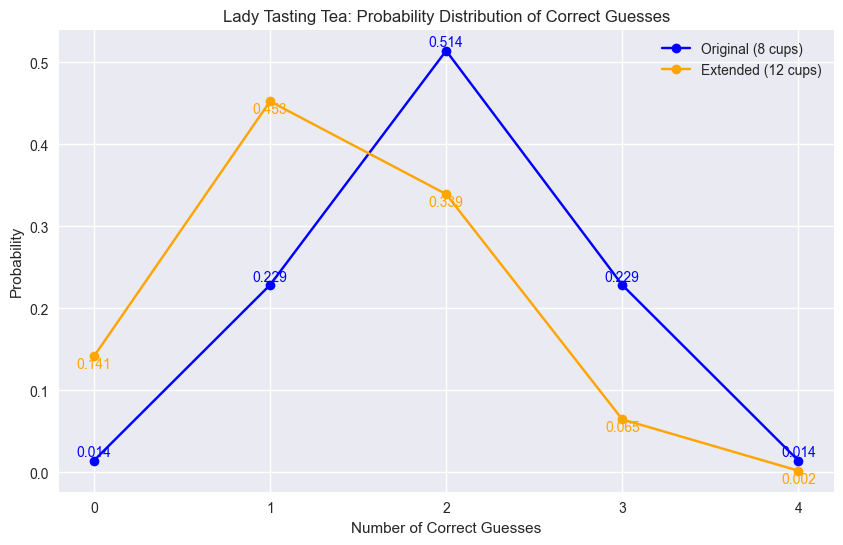

In [23]:
# Enhancing Lady Tasting Tea probability curve with annotations (using Microsoft Co-pilot to help generate part of this graph)
# Original and extended frequency data
original_x, original_freq = np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1])
extended_x, extended_freq = np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1])

# Normalize to probabilities
original_prob = original_freq / original_freq.sum()
extended_prob = extended_freq / extended_freq.sum()

# Plotting
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(original_x, original_prob, marker='o', label='Original (8 cups)', color='blue')
ax.plot(extended_x, extended_prob, marker='o', label='Extended (12 cups)', color='orange')

# Annotate each point with its probability
for x, p in zip(original_x, original_prob):
    ax.text(x, p + 0.005, f"{p:.3f}", ha='center', color='blue')

for x, p in zip(extended_x, extended_prob):
    ax.text(x, p - 0.015, f"{p:.3f}", ha='center', color='orange')

# Axis formatting
ax.set_xticks(original_x)
ax.set_xlabel("Number of Correct Guesses")
ax.set_ylabel("Probability")
ax.set_title("Lady Tasting Tea: Probability Distribution of Correct Guesses")
ax.legend()
ax.grid(True)


**1.4 Discussion & Conclusion**

**The Null Hypothesis**
- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the four cups from the eight cups at random.

**Alternative Hypothesis**
- The lady can tell the difference.

From the above analysis, we can see that the estimated probability of correctly identifying the 4 milk-first cups in the 8-cup set up is *p*=0.014 = 1.4%, and in the 12-cup set is only *p*=0.002 = 0.2%.

This shows that the chance of correctly identifyig all 4 milk_first cups, by guessing, drops dramaticaly in the 12-cup setup therefore making random success highly unlikely. This would suggest that is would be reasonable to relax the *p* value threshold (from 0.05 to 0.10) because the likelihood of a false positive (Type I) error is much lower in the extended iteration of the experiment.



***

## <span style="color:orange">**Problem 02 - Normal Distribution**<span> <a id="problem-02--normal-distribution"></a>

**2.1 Assignment Instructions:**

1. Generate 100,000 samples of size 10 from the standard normal distribution.

2. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). 

3. Plot histograms of both sets of values on the same axes with transparency.

4. Describe the differences you see. 

5. Explain how you expect these differences to change if the sample size is increased.

***

**2.2 Data Analysis**

First we need to import our prerequisites

In [39]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Data manipulation.
import pandas as pd

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

***

**1. <u>Generate 100,000 samples of size 10 from the standard normal distribution.</u>**

[**numpy.random.normal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

    random.normal(loc=0.0, scale=1.0, size=None)

where: 

- ``loc`` is the mean (center) of the **normal distribution**, in this equation=0 (standard normal).

- ``scale`` is the **standard deviation** (spread or "width") of the normal distribution, in this equation=1 (standard normal).

- ``size`` is the shape of the output array, in this equation=(100000, 10) means 100,000 samples each of size 10.

<span style="color:red; font-weight:bold">Look into how you would set up a generator as an alternative to numpy.random.binomial.</span>

In [40]:
# Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
samples = np.random.normal(loc=0, scale=1, size=(100000, 10))

# Optional: check shape and preview
print(samples.shape)       # Output: (100000, 10)
print(samples[:5])         # Preview first 5 samples

(100000, 10)
[[ 0.59713699 -1.45918627 -1.59646161  0.09478064 -0.46650724  1.61265791
   1.02277686 -0.59920578  2.06437334 -1.06991041]
 [ 0.21918913 -1.82455253 -1.46034126  2.20717958 -0.10997169  0.56914341
   0.62665401 -1.85896932 -0.17339437 -0.7938237 ]
 [-0.16831737 -0.89064661  0.33787854  1.04537122 -0.27059346  0.06179845
   0.20669989 -0.8183832  -0.44692677 -0.22631546]
 [ 0.51615068  0.93520464  1.10146071 -1.89515168 -0.28738598 -0.26537683
   0.77966301  0.08358723  1.6458944  -1.01558093]
 [ 0.02724322 -0.57090514 -1.45140379  1.2978918   1.34242471  1.31957235
   1.25509792  0.90257725  0.14834237 -0.23848812]]


**<u>Normality.</u>**

1. Lets visually check that this data is normally distributed using a [Q-Q Plot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html). 

- ``flatten()``, converts this 2D array into a 1D array (vector) of length 1,000,000.

A QQ plot requires a single sequence of values to compare against theoretical quantiles. By flattening, we treat all simulated values as one continuous dataset rather than keeping them in separate columns.

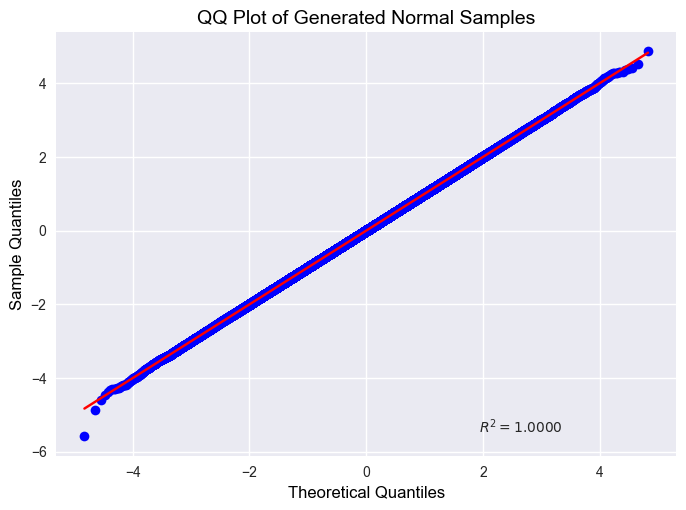

In [41]:
# Flatten the 2D array into 1D for QQ plot
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
data = samples.flatten()

# Create QQ plot
# probplot returns (theoretical quantiles, ordered values)
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
stats.probplot(data, dist="norm", plot=plt, rvalue=True)

# Add labels and title
plt.title("QQ Plot of Generated Normal Samples", fontsize=14, color="black")
plt.xlabel("Theoretical Quantiles", fontsize=12, color="black")
plt.ylabel("Sample Quantiles", fontsize=12, color="black")

# Show plot
plt.show()

2. Let statistically verify that the data is normally distributed using the [Shaprio-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
- if p > 0.05, we fail to reject H0 (the null hypothesis) hence the data is normally distributed, and
- if p < 0.05, we w eject H0 and can state that the data deviates from normality.

In [42]:
data = samples.flatten()   # flatten to 1D (as explained above)

# Perform the Shapiro Wilk test.
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
stat, p = stats.shapiro(data[:5000])  # limit to 5000 values (recommended)
print("Shapiro-Wilk Statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("Fail to reject H0: Data looks normally distributed")
else:
    print("Reject H0: Data deviates from normality")


Shapiro-Wilk Statistic: 0.998984449335456
p-value: 0.003954982765104746
Reject H0: Data deviates from normality


Both of the above methods verify that the generated data is in fast normally distributed.

***

**2. <u>For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). </u>**

[numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

    numpy.std(samples, axis=None, ddof=0)

where:

- ``samples`` = the array that we want to compute the **standard deviation** of.

- ``axis=1``= computes the standard deviation **across each row**, treating each row as one sample.

- ``ddof=1``= Means **Delta Degrees of Freedom**, and divides by \( n - 1 \), giving the **sample standard deviation**.

- ``ddof=0``= divides by \( n \), giving the **population standard deviation**.


In [43]:
# Compute sample standard deviation (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Compute population standard deviation (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

# Optional: preview
print("Sample SD (first 5):", sample_sd[:5])
print("Population SD (first 5):", population_sd[:5])

Sample SD (first 5): [1.27668025 1.27150631 0.57079528 1.06450696 0.97205156]
Population SD (first 5): [1.21116523 1.2062568  0.54150395 1.00987997 0.92216908]


***

**3. <u>Plot histograms of both sets of values on the same axes with transparency.</u>**

- [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy-mean), was used to help visualise the mean for SSD and PSD.


c:\Users\Laura\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


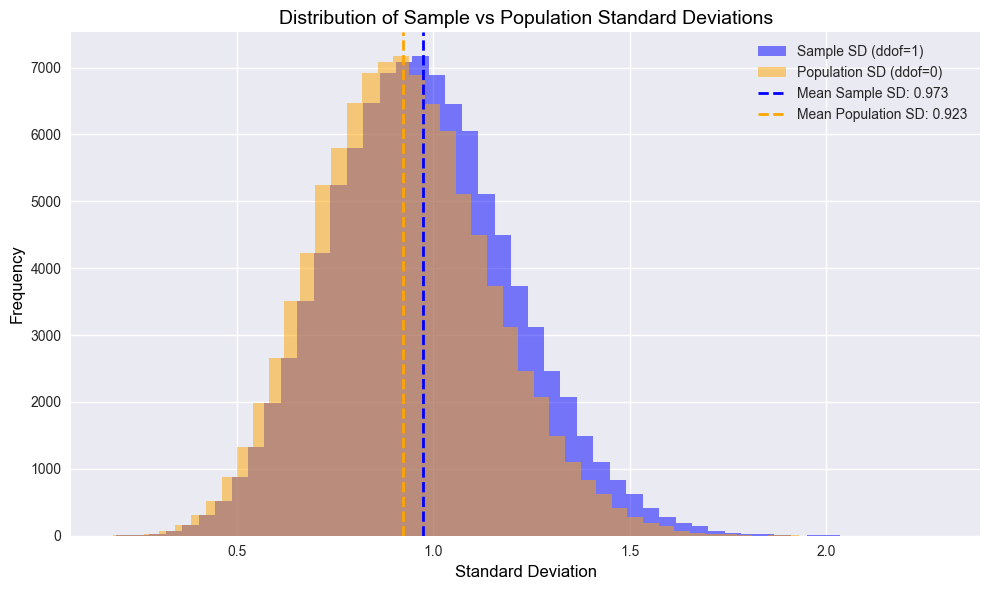

In [44]:
# Calculate means
# After creating the original plot, I decided it would be beneficial to see the mean for each population.
mean_sample = np.mean(sample_sd)
mean_population = np.mean(population_sd)

# Plot histograms
# Create the plot, as a histogram. 
plt.style.use('seaborn-v0_8')

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue')
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='orange')

# Add mean lines
plt.axvline(mean_sample, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Sample SD: {mean_sample:.3f}')
plt.axvline(mean_population, color='orange', linestyle='dashed', linewidth=2, label=f'Mean Population SD: {mean_population:.3f}')

# Add title and labels
plt.title('Distribution of Sample vs Population Standard Deviations', fontsize=14, color='black')
plt.xlabel('Standard Deviation', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


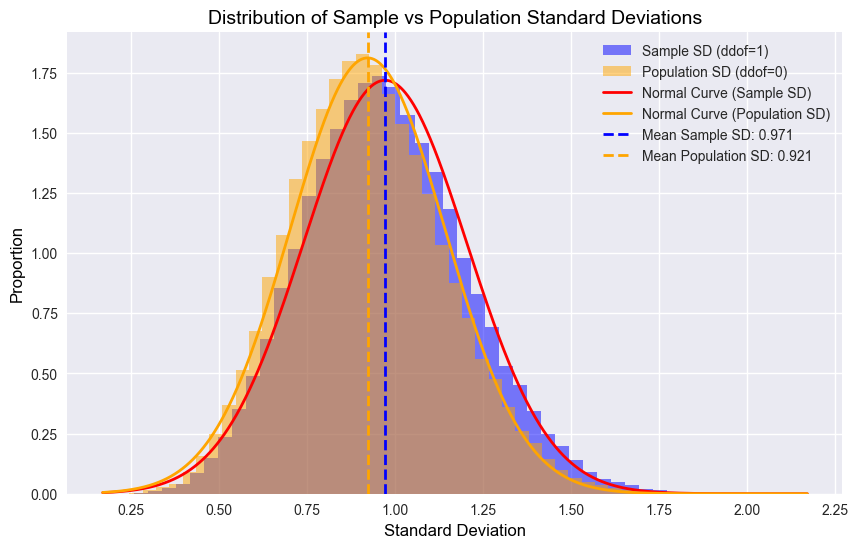

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Compute mean and std for population distribution
# np.mean → arithmetic mean of array
# np.std(..., ddof=0) → population standard deviation (divide by N)
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.mean.html
#            https://numpy.org/doc/stable/reference/generated/numpy.std.html
mean_sample = np.mean(sample_sd)
std_sample = np.std(sample_sd, ddof=1)

mean_population = np.mean(population_sd)
std_population = np.std(population_sd, ddof=0)

# Compute mean and std for sample distribution
# ddof=1 → sample standard deviation (divide by N-1)
mean_sample = np.mean(sample_sd)
std_sample = np.std(sample_sd, ddof=1)

# Set plot style for cleaner visuals
# Reference: https://matplotlib.org/stable/tutorials/introductory/customizing.html#using-style-sheets
plt.style.use('seaborn-v0_8')

# Create figure with specified size
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(10, 6))

# Plot normalized histograms (proportions)
# bins=50 → number of intervals
# alpha=0.5 → transparency
# density=True → normalize histogram to proportions (area = 1)
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue', density=True)
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='orange', density=True)

# Generate x values for normal curves
# np.linspace → evenly spaced values across range
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(min(min(sample_sd), min(population_sd)), 
                max(max(sample_sd), max(population_sd)), 1000)

# Normal distribution curve for sample SD
# norm.pdf → probability density function of normal distribution
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
y_sample = norm.pdf(x, loc=mean_sample, scale=std_sample)
plt.plot(x, y_sample, 'r-', linewidth=2, label='Normal Curve (Sample SD)')

# Normal distribution curve for population SD
y_pop = norm.pdf(x, loc=mean_population, scale=std_population)
plt.plot(x, y_pop, 'orange', linewidth=2, label='Normal Curve (Population SD)')

# Add mean lines for both distributions
# axvline → vertical line at given x-value
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html
plt.axvline(mean_sample, color='blue', linestyle='dashed', linewidth=2, 
            label=f'Mean Sample SD: {mean_sample:.3f}')
plt.axvline(mean_population, color='orange', linestyle='dashed', linewidth=2, 
            label=f'Mean Population SD: {mean_population:.3f}')

# Add title and labels
# Reference: https://matplotlib.org/stable/tutorials/text/text_intro.html
plt.title('Distribution of Sample vs Population Standard Deviations', fontsize=14, color='black')
plt.xlabel('Standard Deviation', fontsize=12, color='black')
plt.ylabel('Proportion', fontsize=12, color='black')

# Add legend for clarity
plt.legend()

# Show plot
plt.show()

In [ ]:
#  To get a better look at the data, I created a DataFrame, and display descriptive statistics
df = pd.DataFrame({
    'Sample_SD': sample_sd,
    'Population_SD': population_sd
})

# Get descriptive statistics
print(df.describe())

           Sample_SD  Population_SD
count  100000.000000  100000.000000
mean        0.972655       0.922741
std         0.230999       0.219145
min         0.206456       0.195862
25%         0.811371       0.769735
50%         0.962251       0.912871
75%         1.123109       1.065474
max         2.060697       1.954948


***

**4. Describe the differences you see.**

From the plot of *sample standard deviations* (SSD) versus *population standard deviations*(PSD) we can see that:

- SSD are, on average, slightly larger that the PSD.

- By using the ``alpha=0.5`` parameter in the ``plt.hist`` function, qw can see the overlapping regions when both distributions are similar, however the SSD histogram appears to extend slightly further to the right, showing higher variability.

- With regards to comparing the means, the mean of SSD is slighty greater than PSD.

- Both distribtions are bell-shapped, bu SSD has a wider spread, due to the correction factor. PSD is tighter and more centered around the true standard deviation (=1).

After a little bit of research, it is my undrstanding that the above is due to the fact that SSD corrects for the fact of estimating from incomplete data, where as PSD assumes that you have all the data and does not apply a correction. Numpy implements this via the divisor (n - ddof), so setting ddof=0 divides by n (population), and ddof=1 divides by n-1 (sample). 
(Reference: https://numpy.org/doc/stable/reference/generated/numpy.std.html)


By default, ``ddof=0`` computes PSD, 

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

where as ``ddof=1`` SSD, correct for bias when estimating from a sample (Bessel’s correction). 

$$
s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Where:

- 𝜎 : population standard deviation.
- 𝑛: number of observations.
- 𝑥𝑖: each individual value.
- 𝜇: population mean.

(References:
MathJax / Jupyter Markdown — https://docs.mathjax.org/en/latest/ 
Jupyter notebook Markdown math usage (MathJax) — https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#markdown-cells)


***

**5. Explain how you expect these differences to change if the sample size is increased.**

- Because SSD uses (Bessel’s correction, ``*n*-1``), to correct for bias, the difference between ``*n*`` and ``*n*-1`` decreased, therefore SSD wold converge towards PSD, reducing the impact of the correction.

- We would expect the distribution of both populations for becaome narrowe and more centerd around the true standard devation.

- Visually, we would expect both histograms to overlap more.

According to the NumPy documentation, ``ddof`` adjusts the divisor to account for sample bias. As sample size increases, the impact of subtracting 1 from 𝑛 decreases, making SSD and PSD nearly equivalent (Refernce: https://numpy.org/doc/stable/reference/generated/numpy.std.html)

This can be seen is we run 3 simulations of varying sample size, below.

   Sample Size  Mean Sample SD  Mean Population SD  Mean Difference
0           10        0.972315            0.922419         0.049896
1          100        0.997875            0.992873         0.005002
2         1000        0.999786            0.999286         0.000500


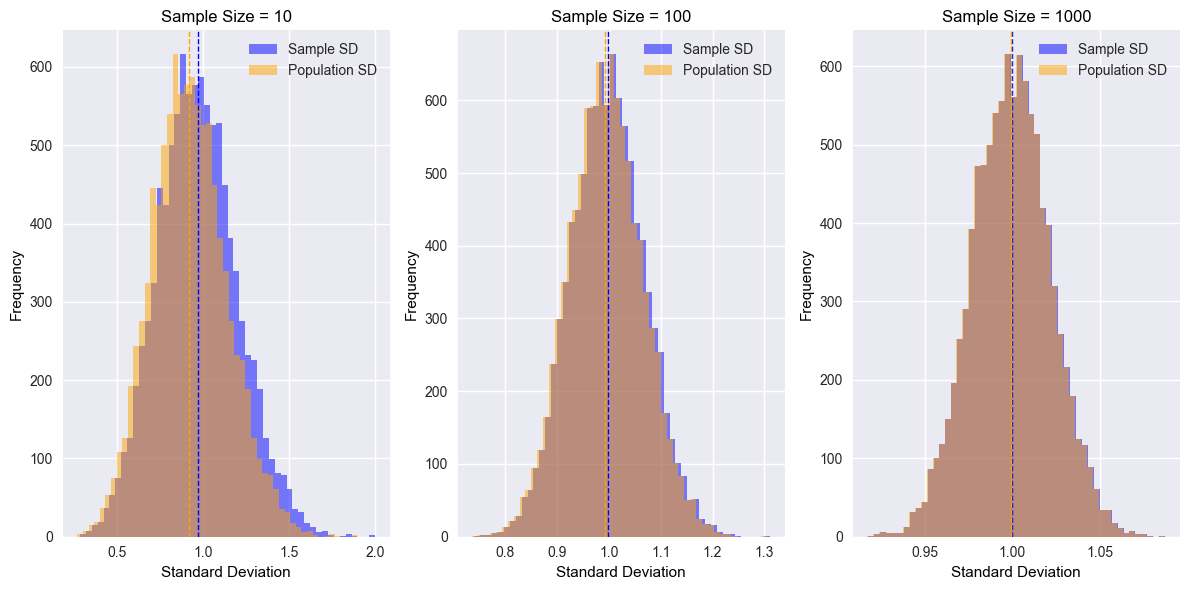

In [ ]:
# Sample sizes to test
sample_sizes = [10, 100, 1000]
n_samples = 10000  # Number of samples per size

# Store results
results = []

for size in sample_sizes:
    data = np.random.normal(loc=0, scale=1, size=(n_samples, size))
    sample_sd = np.std(data, axis=1, ddof=1)
    population_sd = np.std(data, axis=1, ddof=0)
    
    # Store mean difference
    results.append({
        'Sample Size': size,
        'Mean Sample SD': np.mean(sample_sd),
        'Mean Population SD': np.mean(population_sd),
        'Mean Difference': np.mean(sample_sd - population_sd)
    })

# Convert to DataFrame
df = pd.DataFrame(results)
print(df)

# Plot histograms for visual comparison
plt.figure(figsize=(12, 6))
for i, size in enumerate(sample_sizes):
    data = np.random.normal(loc=0, scale=1, size=(n_samples, size))
    sample_sd = np.std(data, axis=1, ddof=1)
    population_sd = np.std(data, axis=1, ddof=0)
    
    plt.subplot(1, 3, i+1)
    plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD', color='blue')
    plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD', color='orange')
    plt.axvline(np.mean(sample_sd), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(population_sd), color='orange', linestyle='dashed', linewidth=1)
    plt.title(f'Sample Size = {size}', color='black')
    plt.xlabel('Standard Deviation', color='black')
    plt.ylabel('Frequency', color='black')
    plt.legend()

plt.tight_layout()
plt.show()

**2.3 Discussion & Conclusion**

This problem set highlights the statistical distinction between sample and population standard deviation, particularly in the context of small sample sizes. By generating 100,000 samples of size 10 from a standard normal distribution, we observed that the sample standard deviation (computed with `ddof=1`) consistently yielded higher values than the population standard deviation (`ddof=0`). This discrepancy arises from Bessel’s correction, which adjusts for bias when estimating variability from incomplete data. The histograms visually confirmed this difference, with the SSD distribution slightly shifted to the right. However, as sample size increases, the impact of this correction reduces. This reinforces a key statistical principle: while bias correction is essential for small samples, its influence fades with larger datasets, making SSD and PSD nearly interchangeable in large-scale analysis.

(Reference; Bessels Correction, https://en.wikipedia.org/wiki/Bessel%27s_correction).

***

## <span style="color:orange">**Problem 03 -  t-Tests**<span> <a id="problem-03--t-tests"></a>

**3.1 Assignment Instructions:**

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.

***

## <span style="color:orange">**Problem 04 -  ANOVA**<span> <a id="problem-04--anova"></a>

**Assignment Instructions:**

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

***

### End